# Load Libraries and Data

In [85]:
import pandas as pd
import seaborn as sns

In [49]:
crime_data = 'D:/OneDrive - PACCAR Inc/Current_Projects/Personal/Courses/DataScientist/Project 1/cov2_crimerate/src/data/COB_CrimeReport.csv'
data = pd.read_csv(crime_data, index_col=[0])

In [50]:
print("data:", data.shape)

data: (139487, 5)


In [51]:
data.head()

,Date,Location,Offence,Crime Category,Case
11400,Jun 2 2015 2:21PM,1400 BLK WOBURN ST,911 HANG UP CALL,Other,15B24377Officers attempted to locate the sour...
29704,Apr 5 2016 9:30AM,1300 BLK TEXAS ST,911 HANG UP CALL,Other,16B11316Citizen reported a 7 yr old child cal...
41070,Oct 6 2016 2:56PM,200 BLK SAMISH WAY,911 HANG UP CALL,Other,16B44312Officers responded to a 911 Hang Up c...
58653,Aug 16 2017 12:00PM,400 BLK BARNES RD,911 HANG UP CALL,Other,17B32138911 hang up from that address.
69480,Feb 26 2018 8:00AM,4300 BLK GOODING AVE,911 HANG UP CALL,Other,17B64037Officers responded to a residence for...


# Exploratory Data Analysis

In [52]:
data.describe()

,Date,Location,Offence,Crime Category,Case
count,139487,139487,139487,139487,139487
unique,123829,3925,142,13,135173
top,Jul 11 2019 1:00PM,000 BLK BELLIS FAIR PKWY,THEFT,Statutory Crime,20B32371Officers responded to a report of sex...
freq,27,2677,10319,50910,2


In [53]:
data.isnull().sum()

Date              0
Location          0
Offence           0
Crime Category    0
Case              0
dtype: int64

In [54]:
print(data.dtypes)

Date              object
Location          object
Offence           object
Crime Category    object
Case              object
dtype: object


## Lets ask some simple questions

1. Which location had the most crime per quarter between 2015 and 2021?
2. Which location had the least crime per quarter between 2015 and 2021?
3. How has each category of crime evolved in Bellingham between 2015 and 2021?

In [55]:
#select only crime data
data = data[~(data['Crime Category'].isin(['Juvenile','Other','Welfare']))]
data.head()

,Date,Location,Offence,Crime Category,Case
177,Jan 30 2015 3:29AM,4100 BLK BAKERVIEW SPUR,ABANDONED VEHICLE,Property Crime,15B02542A vehicle belonging to (R1) was remov...
183,Jan 29 2015 11:19PM,2200 BLK W BIRCH ST,ABANDONED VEHICLE,Property Crime,15B02839A vehicle belonging to (R1) was towed...
226,Jan 29 2015 9:10AM,800 BLK 20TH ST,ABANDONED VEHICLE,Property Crime,15B03968A vehicle belonging to (R1) was towed...
244,Jan 28 2015 8:28PM,1000 BLK 23RD ST,ABANDONED VEHICLE,Property Crime,15B03927Abandoned Vehicle.
502,Jan 25 2015 2:17AM,1700 BLK IRON ST,ABANDONED VEHICLE,Property Crime,"15B07100On the above date and time, we receiv..."


In [56]:
#add quarter to data
data.Date = pd.to_datetime(data.Date)
data['Quarter']=data['Date'].dt.to_period("Q")
data.head()

,Date,Location,Offence,Crime Category,Case,Quarter
177,2015-01-30 03:29:00,4100 BLK BAKERVIEW SPUR,ABANDONED VEHICLE,Property Crime,15B02542A vehicle belonging to (R1) was remov...,2015Q1
183,2015-01-29 23:19:00,2200 BLK W BIRCH ST,ABANDONED VEHICLE,Property Crime,15B02839A vehicle belonging to (R1) was towed...,2015Q1
226,2015-01-29 09:10:00,800 BLK 20TH ST,ABANDONED VEHICLE,Property Crime,15B03968A vehicle belonging to (R1) was towed...,2015Q1
244,2015-01-28 20:28:00,1000 BLK 23RD ST,ABANDONED VEHICLE,Property Crime,15B03927Abandoned Vehicle.,2015Q1
502,2015-01-25 02:17:00,1700 BLK IRON ST,ABANDONED VEHICLE,Property Crime,"15B07100On the above date and time, we receiv...",2015Q1


In [77]:
data_quarter_grouped=data.groupby(['Quarter','Location'])['Case'].count().nlargest(5)

Which location had the most crime per quarter between 2015 and 2021?

In [78]:
data_quarter_grouped

Quarter  Location                   
2018Q1    000   BLK BELLIS FAIR PKWY    209
2017Q4    000   BLK BELLIS FAIR PKWY    159
2017Q3    000   BLK BELLIS FAIR PKWY    151
2019Q2    000   BLK BELLIS FAIR PKWY    138
2017Q2    000   BLK BELLIS FAIR PKWY    128
Name: Case, dtype: int64

In [80]:
data_quarter_grouped=data.groupby(['Quarter','Location'])['Case'].count().nsmallest(5)

Which location had the least crime per quarter between 2015 and 2021?

In [81]:
data_quarter_grouped

Quarter  Location          
2015Q1    100   BLK 25TH ST    1
          100   BLK 32ND ST    1
          100   BLK 34TH ST    1
          100   BLK 35TH ST    1
          100   BLK 44TH ST    1
Name: Case, dtype: int64

In [111]:
data_crimecat_grouped=data.groupby(['Quarter','Crime Category'])['Case'].count().reset_index()

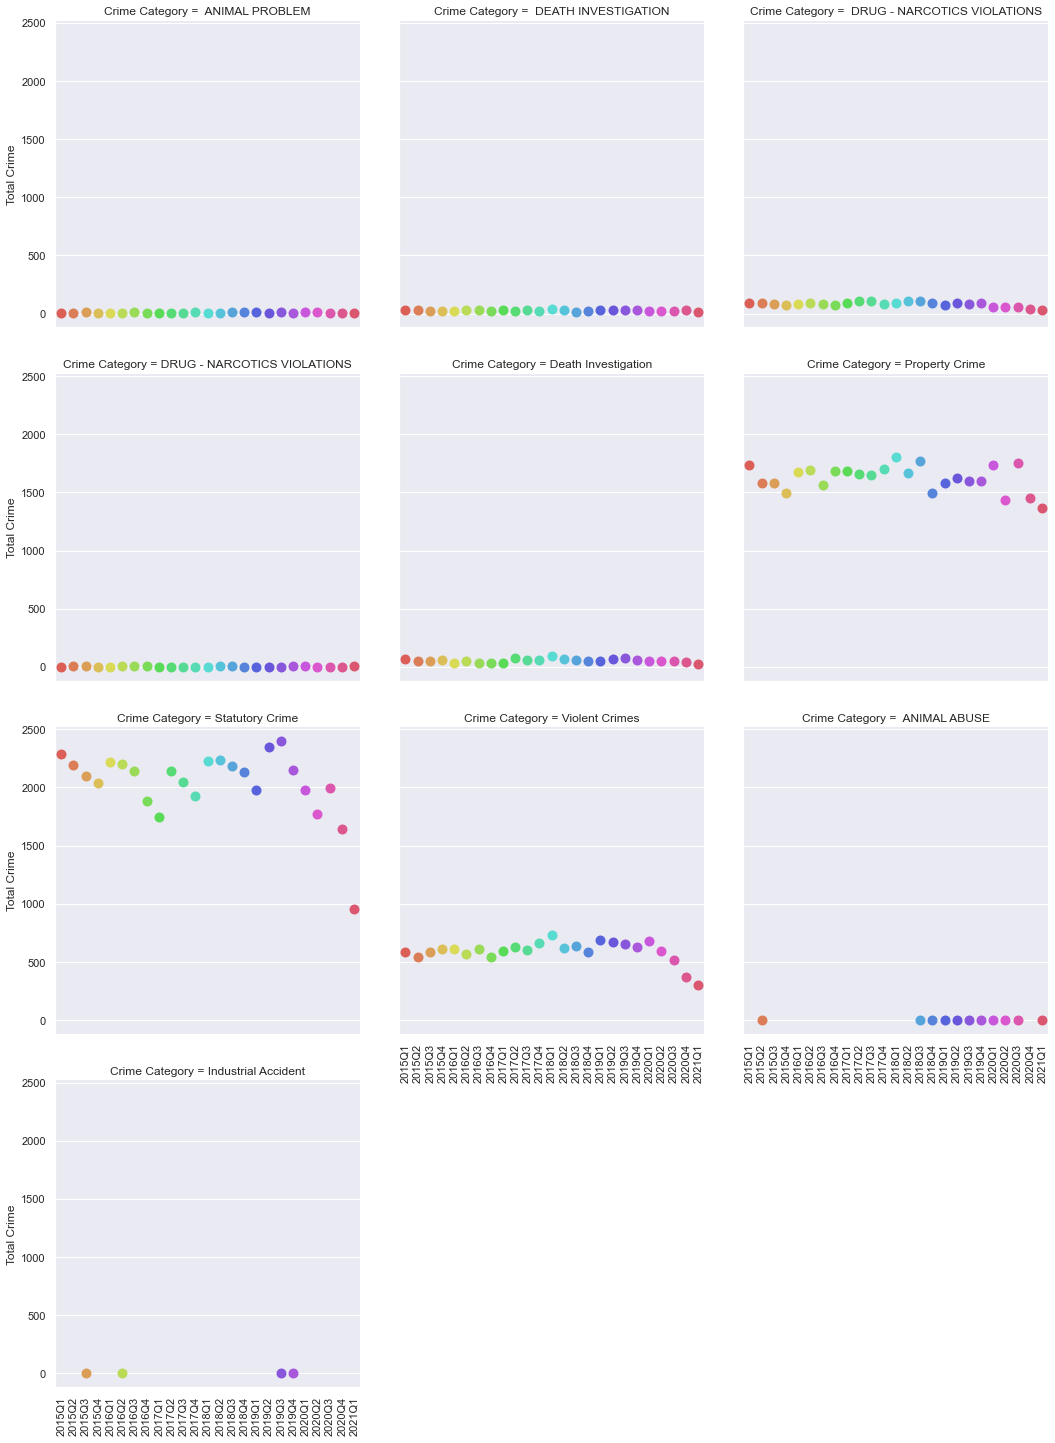

In [139]:
sns.set(font_scale=10)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.catplot(x='Quarter', y='Case', col='Crime Category', data=data_crimecat_grouped, kind='swarm', height=5, aspect=1, legend=True,palette='hls',col_wrap = 3,s=10)
chart.set_xticklabels(rotation=90)
chart.set_axis_labels("","Total Crime")
